![alt text](https://www.boaconsulta.com/blog/wp-content/uploads/2018/11/sintomas-da-diabetes-saiba-como-reconhecer-essa-doenca.jpeg)

###Análise Descritiva dos Dados de Saúde em Diabetes





O conjunto de dados usado no projeto é basicamente do NIDDK (Instituto Nacional de Diabetes e Doenças Digestivas e Renais).

O objetivo deste projeto é prever se a pessoa é diabética ou não, com base em várias variáveis ​​presentes no conjunto de dados.

A principal razão por trás da pessoa ser diabética é ter alto nível de açúcar no sangue ou glicose no sangue. A principal fonte de energia é a glicose dos alimentos que ingerimos. Basicamente, uma célula especial no pâncreas produz um hormônio chamado insulina. 

Esta insulina tem a função de mover a glicose do sangue para as células para obter energia. Se o pâncreas não estiver produzindo insulina suficiente ou se deslocar para as células, a glicose é mantida no sangue que causa o problema de diabetes.

Os dados consistem em variáveis ​​preditoras e na variável de destino.
As variáveis ​​preditoras são glicose, pressão arterial, insulina, IMC, gravidez, idade, espessura da pele, função do pedigree do diabetes.

A variável de destino é o resultado. Já está em valores binários (0 e 1). O valor 0 representa para não diabéticos e 1 valor representa diabético.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dados = pd.read_csv('/content/drive/My Drive/Diabetes_Renal/diabetes.csv')

In [3]:
dados.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [4]:
dados.shape

(768, 9)

Isso significa que o conjunto de dados possui 768 linhas e 9 colunas. Se quisermos ver apenas algumas linhas, use head ().

In [8]:
dados.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

##Transponha o quadro de dados.

In [11]:
dados.head(5).transpose()

,0,1,2,3,4
Pregnancies,6.000,1.000,8.000,1.000,0.000
Glucose,148.000,85.000,183.000,89.000,137.000
BloodPressure,72.000,66.000,64.000,66.000,40.000
SkinThickness,35.000,29.000,0.000,23.000,35.000
Insulin,0.000,0.000,0.000,94.000,168.000
BMI,33.600,26.600,23.300,28.100,43.100
DiabetesPedigreeFunction,0.627,0.351,0.672,0.167,2.288
Age,50.000,31.000,32.000,21.000,33.000
Outcome,1.000,0.000,1.000,0.000,1.000


Para exibir o intervalo específico de linhas no quadro de dados. Às vezes, apenas esse intervalo é informativo para a previsão. Para isso, usamos um método de fatia com colchete, o valor da linha inicial é anterior aos dois pontos e o valor da última linha é posterior aos dois pontos.

In [12]:
#para exibir um intervalo especifico de linhas utilizamos o 

dados[5:10]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Vou mostrar a ultima linha

In [14]:
dados[-5:]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


Para obter alguma inferência dos dados, podemos criar um histograma de variáveis. Para que possamos fazer mais disputas de dados.

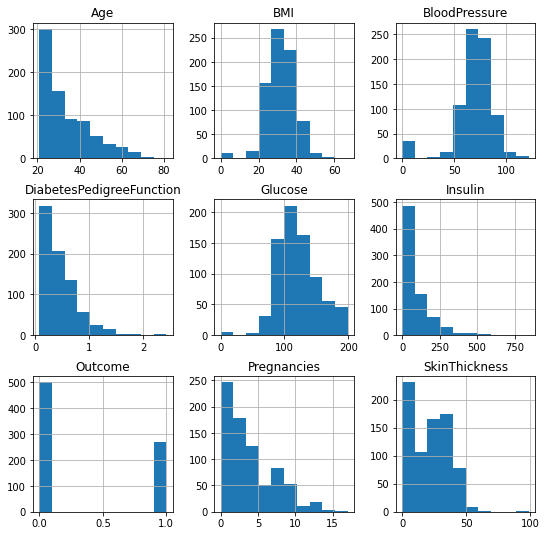

In [16]:
#Para exibir o histograma de cadad variavel 

dados.hist(figsize=(9,9))
plt.show()

Queremos saber os números exatos da pessoa diabética e não diabética na variável resultado. Bem, o objetivo já é conhecido, pois observamos que 768 pessoas, 500 são não diabéticas e o restante é diabético.

In [17]:
dados.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

Se quisermos ver o resultado, de acordo com a idade, podemos fazer um gráfico de barras empilhadas.

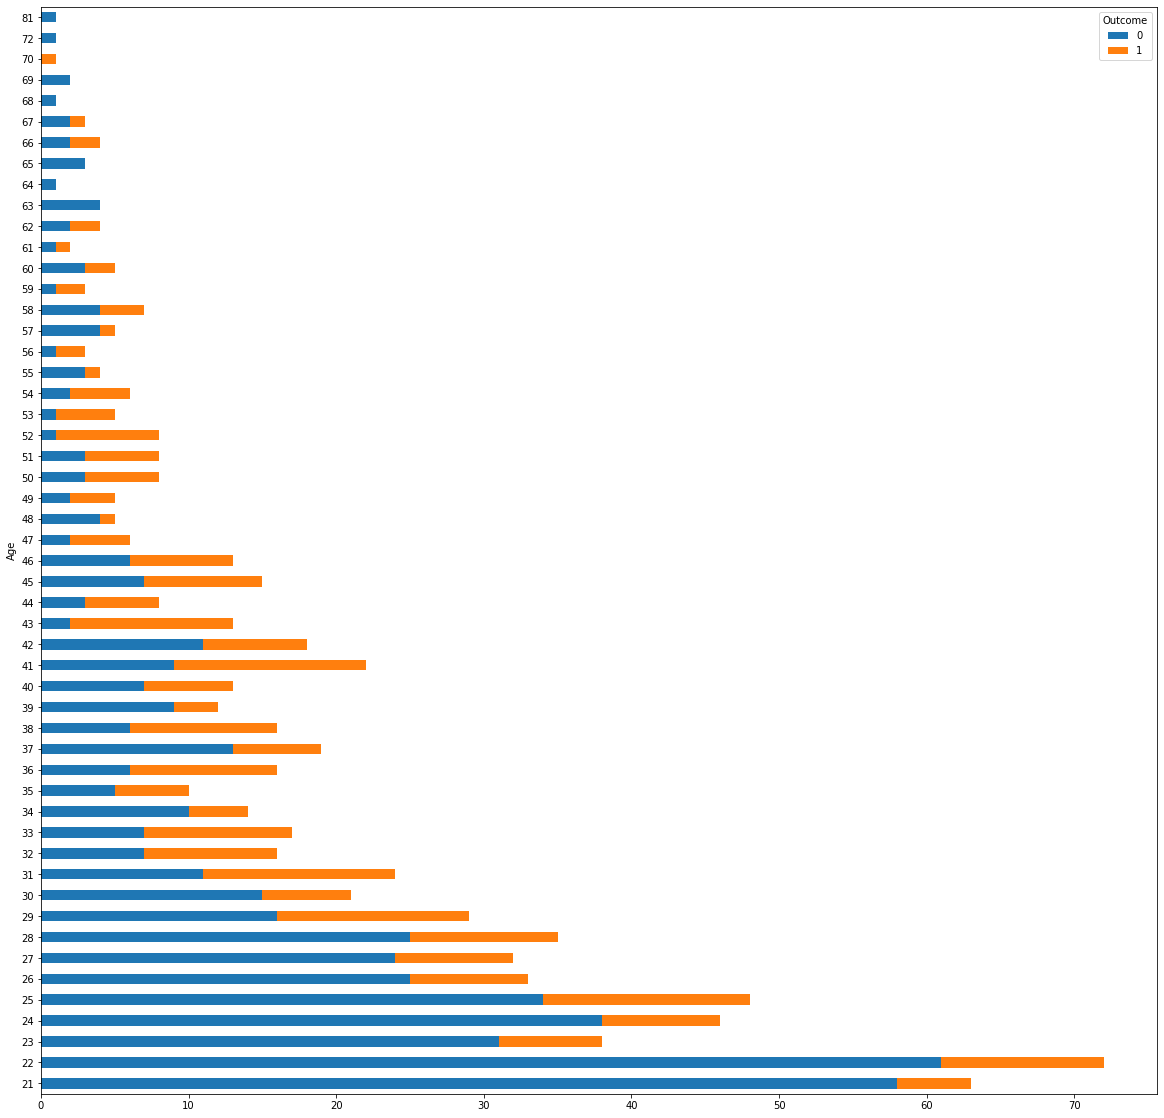

In [19]:
dados.groupby(['Age','Outcome']).size().unstack().plot(kind='barh',
                                          figsize = (20,20), stacked=True)

plt.show()

Lidando com zero e valores ausentes no conjunto de dados


No histograma da pressão arterial , observamos que algumas pessoas têm valor 0. mas, para uma pessoa, a pressão arterial diastólica não é zero. Então, precisamos corrigir esse valor zero. Podemos corrigi-lo colocando o valor médio. Primeiro, é preciso ver onde estão os valores zero na coluna Pressão sanguínea.

In [20]:
dados.head(100)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
95,6,144,72,27,228,33.9,0.255,40,0
96,2,92,62,28,0,31.6,0.130,24,0
97,1,71,48,18,76,20.4,0.323,22,0
98,6,93,50,30,64,28.7,0.356,23,0


Para fixar o valor zero, o código a seguir mascara o valor médio no lugar do valor zero e pode ser um valor flutuante para torná-lo um valor inteiro.

In [21]:
#Tratando zero na pressão sanguínea

mean_bp = dados['BloodPressure'].mean(skipna=True)

mean_bp

69.10546875

In [22]:
dados['BloodPressure'] = dados.BloodPressure.mask(dados.BloodPressure == 0, mean_bp)

dados['BloodPressure'] = dados['BloodPressure'].astype(float).astype(int)

In [23]:
dados.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,69,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Mas nos dados médicos, acho que a substituição do zero pelo valor médio também não é boa. A insulina é muito importante para pessoas diabéticas. Portanto, ter um valor zero também não faz sentido.
A variável de nível de Glucose também possui alguns valores zero. vamos checar. A de acordo com os [dados](https://medlineplus.gov/ency/patientinstructions/000085.htm), o nível de glicose abaixo de 70 mg / dl pode prejudicar o corpo.

In [24]:
# Total número de zeros na coluna de glicose 

dados[dados.Glucose == 0].shape[0]

5

In [25]:
#Tratando Zero em Glucose(Glicose)

mean_Glucose = dados['Glucose'].mean(skipna = True)
mean_Glucose

120.89453125

In [27]:
#Transformar para inteiro 

dados['Glucose'] = dados.Glucose.mask(dados.Glucose == 0, mean_Glucose)

In [29]:
dados['Glucose'] = dados['Glucose'].astype(float).astype(int)

In [30]:
dados.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
dados.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Espessura da pele(Skin Thickness) também não deve ser zero, a espessura mínima da pele em nosso corpo é de 0,05 mm de espessura. O valor zero na variável Skin Thickness é muito grande.

In [35]:
dados[dados.SkinThickness == 0].shape[0]

227

In [37]:
#Tratar zero na espessura da pele
mean_sk = dados['SkinThickness']. mean (skipna = True) 
mean_sk
dados ['SkinThickness'] = dados.SkinThickness.mask (dados.SkinThickness == 0, mean_sk) 
dados ["SkinThickness"] = dados ["SkinThickness"]. astype (float) .astype (int) 
dados.head ()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,20,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Variáveis ​​de IMC(BMI) e insulina (Insulin)também contêm valores nulos. Então, tratando esses zeros também.

In [39]:
mean_bmi = dados['BMI'].mean(skipna=True)
mean_bmi
dados['BMI']=dados.BMI.mask(dados.BMI == 0,mean_bmi)
dados["BMI"] = dados["BMI"].astype(float).astype(int)
dados.head(10)
#Trattando os Zeros da coluna INsulina
mean_insulin = dados['Insulin'].mean(skipna=True)
mean_insulin
dados['Insulin']=dados.Insulin.mask(dados.Insulin == 0,mean_insulin)
dados["Insulin"] = dados["Insulin"].astype(float).astype(int)
dados.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,79,33,0.627,50,1
1,1,85,66,29,79,26,0.351,31,0
2,8,183,64,20,79,23,0.672,32,1
3,1,89,66,23,94,28,0.167,21,0
4,0,137,40,35,168,43,2.288,33,1
5,5,116,74,20,79,25,0.201,30,0
6,3,78,50,32,88,31,0.248,26,1
7,10,115,69,20,79,35,0.134,29,0
8,2,197,70,45,543,30,0.158,53,1
9,8,125,96,20,79,31,0.232,54,1


O tratamento de valores ausentes e outliers é necessário para ser feito no pré-processamento de dados. Podemos excluir as linhas que possuem esses valores, mas se os outliers estiverem em muitas linhas, a exclusão não é uma opção. Portanto, fazer média / média pode ser feito com base nisso. Mesmo que, se excluirmos as linhas, as informações sobre outros valores relacionados à respectiva coluna também serão excluídas e não podemos prever o bom resultado preciso.
Para obter uma estatística geral dos dados, você pode fazer a função de descrição.

In [45]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.675781,30.436252,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.250000,12.117203,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,26.447917,9.733872,7.000,20.00000,23.0000,32.00000,99.00
Insulin,768.0,118.270833,93.243829,14.000,79.00000,79.0000,127.25000,846.00
BMI,768.0,31.992188,6.879097,18.000,27.00000,32.0000,36.00000,67.00
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Separando as informações das colunas.

Diferencie os dados com base na variável Resultado. Os dados O_one são para diabéticos e O_zero é para não diabéticos.

In [47]:
#Para Diabeticos
O_one = dados[dados['Outcome'] == 1]
O_one.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,79,33,0.627,50,1
2,8,183,64,20,79,23,0.672,32,1
4,0,137,40,35,168,43,2.288,33,1
6,3,78,50,32,88,31,0.248,26,1
8,2,197,70,45,543,30,0.158,53,1


In [48]:
#Para Não Diabeticos
O_zero = dados[dados['Outcome']==0]
O_zero.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,79,26,0.351,31,0
3,1,89,66,23,94,28,0.167,21,0
5,5,116,74,20,79,25,0.201,30,0
7,10,115,69,20,79,35,0.134,29,0
10,4,110,92,20,79,37,0.191,30,0


Se compararmos o histograma de glicose de diabéticos e não diabéticos, podemos ver a imagem clara de que pessoas diabéticas têm mais valores de glicose.

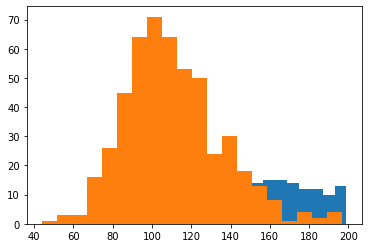

In [50]:
#Diabetico
plt.hist(O_one['Glucose'],histtype='stepfilled',bins=20)
#Não Diabetico
plt.hist(O_zero['Glucose'],histtype='stepfilled',bins=20)

plt.show()

Visualização com Seaborn

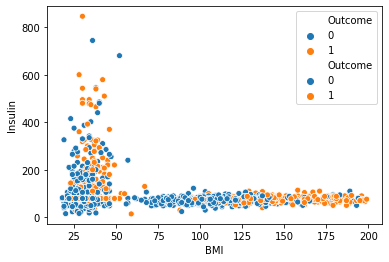

In [53]:
#Importar Seaborn
import seaborn as sns
#relation between Glucose and BloodPressure
g =sns.scatterplot(x= "Glucose" ,y= "BloodPressure",
              hue="Outcome",
              data=dados);
#relation between BMI and Insulin
B =sns.scatterplot(x= "BMI" ,y= "Insulin",
              hue="Outcome",
              data=dados);

            

A Disposição de Dados é uma análise interessante dos dados. Devemos fazer a limpeza e o tratamento de dados com outliers para visualização de dados. A principal observação sobre esses dados é incompleta devido aos zeros presentes em muitas entradas. Esses processos são para prática e demonstração para visualização de dados. Na próxima parte, tentaremos fazer análises preditivas com alguns algoritmos de aprendizado de máquina.

Nome: Clauder Noronha
